In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [23]:
ticker = "AAPL"
start = "2018-01-01"
end = "2023-10-30"

In [24]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722866,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715786,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904911,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370625,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216961,82271200
...,...,...,...,...,...,...
2023-10-23,170.910004,174.009995,169.929993,173.000000,172.772385,55980100
2023-10-24,173.050003,173.669998,171.449997,173.440002,173.211807,43816600
2023-10-25,171.880005,173.059998,170.649994,171.100006,170.874893,57157000


In [25]:
data = df['Close']
print(data.values)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))
data

[ 43.06499863  43.05749893  43.25749969 ... 171.1000061  166.88999939
 168.22000122]


array([[0.04672083],
       [0.04667422],
       [0.04791721],
       ...,
       [0.84245123],
       [0.81628627],
       [0.82455216]])

In [26]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1172, 294)

In [27]:
print("Training Data Type:", type(training_data))
print("Training Data Size:", training_data.size)
print("Training Data Shape", training_data.shape) 
print("Training Data Dimension:", training_data.ndim)
print("Training Data:",training_data)
# print("Testing Data:", testing_data)

Training Data Type: <class 'numpy.ndarray'>
Training Data Size: 1172
Training Data Shape (1172, 1)
Training Data Dimension: 2
Training Data: [[0.04672083]
 [0.04667422]
 [0.04791721]
 ...
 [0.82026383]
 [0.83580119]
 [0.79596338]]


In [28]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 8s 11ms/step - loss: 0.1991
Epoch 2/200
6/6 [==============================] - 0s 16ms/step - loss: 0.1570
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1181
Epoch 4/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0868
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0705
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0706
Epoch 7/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0648
Epoch 8/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0545
Epoch 9/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0446
Epoch 10/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0311
Epoch 11/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0164
Epoch 12/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0047
Epoch 13/200
6/6 [==============================]

6/6 [==============================] - 0s 10ms/step - loss: 1.6945e-04
Epoch 100/200
6/6 [==============================] - 0s 12ms/step - loss: 1.6958e-04
Epoch 101/200
6/6 [==============================] - 0s 10ms/step - loss: 1.7056e-04
Epoch 102/200
6/6 [==============================] - 0s 14ms/step - loss: 1.6988e-04
Epoch 103/200
6/6 [==============================] - 0s 14ms/step - loss: 1.6909e-04
Epoch 104/200
6/6 [==============================] - 0s 13ms/step - loss: 1.7084e-04
Epoch 105/200
6/6 [==============================] - 0s 12ms/step - loss: 1.6954e-04
Epoch 106/200
6/6 [==============================] - 0s 10ms/step - loss: 1.7025e-04
Epoch 107/200
6/6 [==============================] - 0s 10ms/step - loss: 1.7067e-04
Epoch 108/200
6/6 [==============================] - 0s 10ms/step - loss: 1.6984e-04
Epoch 109/200
6/6 [==============================] - 0s 12ms/step - loss: 1.6914e-04
Epoch 110/200
6/6 [==============================] - 0s 8ms/step - loss: 1.6913

6/6 [==============================] - 0s 16ms/step - loss: 1.6858e-04
Epoch 196/200
6/6 [==============================] - 0s 11ms/step - loss: 1.7573e-04
Epoch 197/200
6/6 [==============================] - 0s 11ms/step - loss: 1.7098e-04
Epoch 198/200
6/6 [==============================] - 0s 15ms/step - loss: 1.6952e-04
Epoch 199/200
6/6 [==============================] - 0s 20ms/step - loss: 1.7040e-04
Epoch 200/200
6/6 [==============================] - 0s 23ms/step - loss: 1.6898e-04


In [30]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [31]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [32]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 1.3868509515750926
Root Mean Squared Error (RMSE): 2.0857650423601255


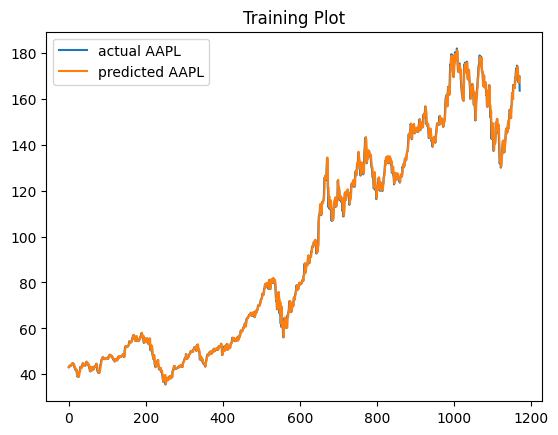

In [33]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 2.037367498508492
Root Mean Squared Error (RMSE): 2.701851611382357


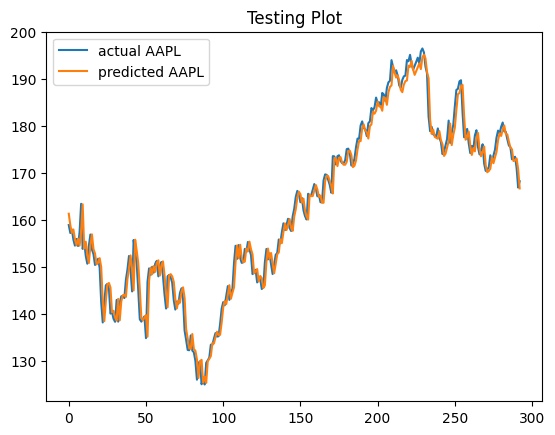

In [34]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [35]:
y_test[-1]

168.22000122070312

In [36]:
pred[-1]

array([166.69951], dtype=float32)

In [37]:
future_start="2023-11-01"
future_end="2023-12-10"

future_data = yf.download(ticker, start=future_start, end=future_end)
future_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,171.000000,174.229996,170.119995,173.970001,173.741104,56934900
2023-11-02,175.520004,177.779999,175.460007,177.570007,177.336380,77334800
2023-11-03,174.240005,176.820007,173.350006,176.649994,176.417572,79763700
2023-11-06,176.380005,179.429993,176.210007,179.229996,178.994186,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.580780,70530000
2023-11-08,182.350006,183.449997,181.589996,182.889999,182.649368,49340300
2023-11-09,182.960007,184.119995,181.809998,182.410004,182.169998,53763500
2023-11-10,183.970001,186.570007,183.529999,186.399994,186.399994,66133400
2023-11-13,185.820007,186.029999,184.210007,184.800003,184.800003,43627500


In [38]:
future_data = np.array(future_data['Close'])
len(future_data)

27

In [39]:
print(type(future_data))
# x = future_data.reshape(-1, 1)
# print(x)
# scaler.transform(x)

<class 'numpy.ndarray'>


In [40]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
future_predictions = future_predictions.flatten()

1/1 [==============================] - 0s 46ms/step


In [41]:
days=list(range(1,len(future_data)+1))

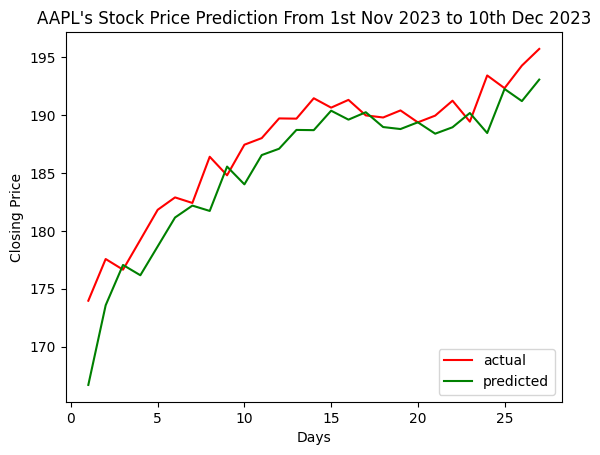

In [42]:
plt.title(f"{ticker}'s Stock Price Prediction From 1st Nov 2023 to 10th Dec 2023")
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(days,future_data, label = 'actual', color='red')
plt.plot(days,future_predictions, label = 'predicted', color='green')
plt.legend(loc='lower right')
plt.show()

In [43]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [44]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)

In [45]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)

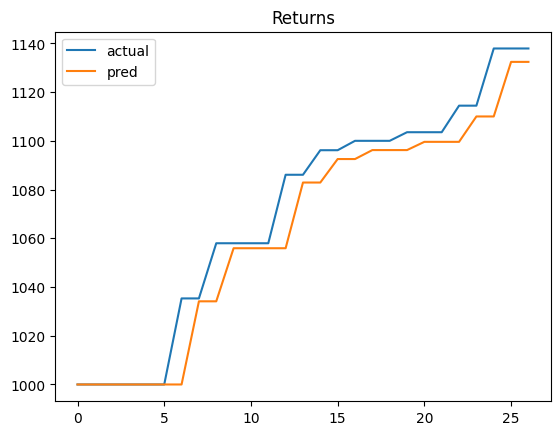

In [46]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()